In [2]:
import pandas as pd
import numpy as np
import sys
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

sys.path.append('.../.../libs/')
init_notebook_mode(connected=True)

import DSF_helpers

state_dict = {v: k for k, v in DSF_helpers.state_name_pairs.items()}

dir = "/path/to/dir/"


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

AGE PER STATE

In [4]:
data = pd.read_csv(dir+'Data/PEP_2017_PEPAGESEX_with_ann.csv')

In [5]:
data.head()

,GEO.id,GEO.id2,GEO.display-label,cen42010sex0_age0to17,cen42010sex1_age0to17,cen42010sex2_age0to17,est42010sex0_age0to17,est42010sex1_age0to17,est42010sex2_age0to17,est72016sex0_age0to17,...,est72016sex2_age18plus,cen42010sex0_medage,cen42010sex1_medage,cen42010sex2_medage,est42010sex0_medage,est42010sex1_medage,est42010sex2_medage,est72016sex0_medage,est72016sex1_medage,est72016sex2_medage
0,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Under 18 ...","April 1, 2010 - Census - Male; Under 18 years","April 1, 2010 - Census - Female; Under 18 years","April 1, 2010 - Estimates Base - Both Sexes; U...","April 1, 2010 - Estimates Base - Male; Under 1...","April 1, 2010 - Estimates Base - Female; Under...",Population Estimate (as of July 1) - 2016 - Bo...,...,Population Estimate (as of July 1) - 2016 - Fe...,"April 1, 2010 - Census - Both Sexes; Median ag...","April 1, 2010 - Census - Male; Median age (years)","April 1, 2010 - Census - Female; Median age (y...","April 1, 2010 - Estimates Base - Both Sexes; M...","April 1, 2010 - Estimates Base - Male; Median ...","April 1, 2010 - Estimates Base - Female; Media...",Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Ma...,Population Estimate (as of July 1) - 2016 - Fe...
1,0400000US01,01,Alabama,1132459,578649,553810,1132467,578656,553811,1098851,...,1967079,37.9,36.4,39.1,37.9,36.4,39.1,38.9,37.4,40.3
2,0400000US02,02,Alaska,187378,96406,90972,187378,96406,90972,186324,...,262872,33.8,33.6,34.1,33.8,33.6,34.1,34.0,33.6,34.5
3,0400000US04,04,Arizona,1629014,831904,797110,1629016,831907,797109,1628054,...,2676258,35.9,34.8,37.2,35.9,34.8,37.2,37.4,36.2,38.8
4,0400000US05,05,Arkansas,711475,363937,347538,711489,363942,347547,705243,...,1176015,37.4,36.1,38.7,37.4,36.1,38.7,38.0,36.6,39.4


In [3]:
#data.DataFrame.drop([""])
#data.columns.values[1]="ID"
#data.columns.values
for column in data.columns.values:
    #print (column[:8])
    #input()
    if column[:8] == "est42010" or "14to17" in column or "18to64" in column:
        data=data.drop(columns=[column])
data.columns.values

array(['GEO.id', 'GEO.id2', 'GEO.display-label', 'cen42010sex0_age0to17',
       'cen42010sex1_age0to17', 'cen42010sex2_age0to17',
       'est72016sex0_age0to17', 'est72016sex1_age0to17',
       'est72016sex2_age0to17', 'cen42010sex0_age18to24',
       'cen42010sex1_age18to24', 'cen42010sex2_age18to24',
       'est72016sex0_age18to24', 'est72016sex1_age18to24',
       'est72016sex2_age18to24', 'cen42010sex0_age25to44',
       'cen42010sex1_age25to44', 'cen42010sex2_age25to44',
       'est72016sex0_age25to44', 'est72016sex1_age25to44',
       'est72016sex2_age25to44', 'cen42010sex0_age45to64',
       'cen42010sex1_age45to64', 'cen42010sex2_age45to64',
       'est72016sex0_age45to64', 'est72016sex1_age45to64',
       'est72016sex2_age45to64', 'cen42010sex0_age65plus',
       'cen42010sex1_age65plus', 'cen42010sex2_age65plus',
       'est72016sex0_age65plus', 'est72016sex1_age65plus',
       'est72016sex2_age65plus', 'cen42010sex0_age85plusr',
       'cen42010sex1_age85plusr', 'cen42010se

In [4]:
id_columns=data.columns.values[2]
print (id_columns)
people_columns=[]
men_columns=[]
women_columns=[]
people_columns.append(id_columns[:])
men_columns.append(id_columns[:])
women_columns.append(id_columns[:])
print(women_columns)

GEO.display-label
['GEO.display-label']


In [5]:
for column in data.columns.values:
    if "2010" in column:
        continue
    if "sex0" in column:
        people_columns.append(column)
    elif "sex1" in column:
        men_columns.append(column)
    elif "sex2" in column:
        #print (column)
        #print (women_columns)
        women_columns.append(column)

In [7]:
print (women_columns)

['GEO.display-label', 'est72016sex2_age0to17', 'est72016sex2_age18to24', 'est72016sex2_age25to44', 'est72016sex2_age45to64', 'est72016sex2_age65plus', 'est72016sex2_age85plusr', 'est72016sex2_age18plus', 'est72016sex2_medage']


In [7]:
age_people = data[people_columns]
age_men = data[men_columns]
age_women = data[women_columns]
age_people.columns = ['State', '0to17','18to24','25to44','45to64','65+','85+','18+','median']
age_men.columns = ['State', '0to17','18to24','25to44','45to64','65+','85+','18+','median']
age_women.columns = ['State', '0to17','18to24','25to44','45to64','65+','85+','18+','median']

In [8]:
age_people

,State,0to17,18to24,25to44,45to64,65+,85+,18+,median
0,Geography,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...
1,Alabama,1098851,462142,1228734,1287937,782881,86919,3761694,38.9
2,Alaska,186324,74589,212843,189470,78296,6316,555198,34.0
3,Arizona,1628054,672655,1781670,1672392,1153871,133252,5280588,37.4
4,Arkansas,705243,282961,756416,756489,487122,57246,2282988,38.0
5,California,9089743,3853557,11125069,9895630,5332477,721049,30206733,36.4
6,Colorado,1259553,521486,1593542,1416436,739088,84549,4270552,36.7
7,Connecticut,752076,352760,864181,1030450,588218,92124,2835609,40.9
8,Delaware,204439,85739,237574,257790,167156,19036,748259,40.2
9,District of Columbia,120911,75292,258852,147234,82047,11915,563425,34.0


In [9]:
age_people['State_Code'] = age_people.State.str.strip().apply(lambda x: DSF_helpers.state_name_to_abrv(x))
age_men['State_Code'] = age_people.State.str.strip().apply(lambda x: DSF_helpers.state_name_to_abrv(x))
age_women['State_Code'] = age_people.State.str.strip().apply(lambda x: DSF_helpers.state_name_to_abrv(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [10]:
age_people

,State,0to17,18to24,25to44,45to64,65+,85+,18+,median,State_Code
0,Geography,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Bo...,None
1,Alabama,1098851,462142,1228734,1287937,782881,86919,3761694,38.9,AL
2,Alaska,186324,74589,212843,189470,78296,6316,555198,34.0,AK
3,Arizona,1628054,672655,1781670,1672392,1153871,133252,5280588,37.4,AZ
4,Arkansas,705243,282961,756416,756489,487122,57246,2282988,38.0,AR
5,California,9089743,3853557,11125069,9895630,5332477,721049,30206733,36.4,CA
6,Colorado,1259553,521486,1593542,1416436,739088,84549,4270552,36.7,CO
7,Connecticut,752076,352760,864181,1030450,588218,92124,2835609,40.9,CT
8,Delaware,204439,85739,237574,257790,167156,19036,748259,40.2,DE
9,District of Columbia,120911,75292,258852,147234,82047,11915,563425,34.0,DC


In [11]:
age_people=age_people.iloc[1:-1]
age_men=age_men.iloc[1:-1]
age_women=age_women.iloc[1:-1]

In [12]:
#df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)
num_col = ['0to17','18to24','25to44','45to64','65+','85+','18+']
#age_people[num_col]=age_people[num_col].apply(pd.to_numeric)
age_people[num_col]=age_people[num_col].astype(int)
age_men[num_col]=age_men[num_col].astype(int)
age_women[num_col]=age_women[num_col].astype(int)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [13]:
#type(age_people.iloc[2]["18to24"])
age_people =age_people.set_index("State_Code")
age_men =age_men.set_index("State_Code")
age_women =age_women.set_index("State_Code")
#age_people


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

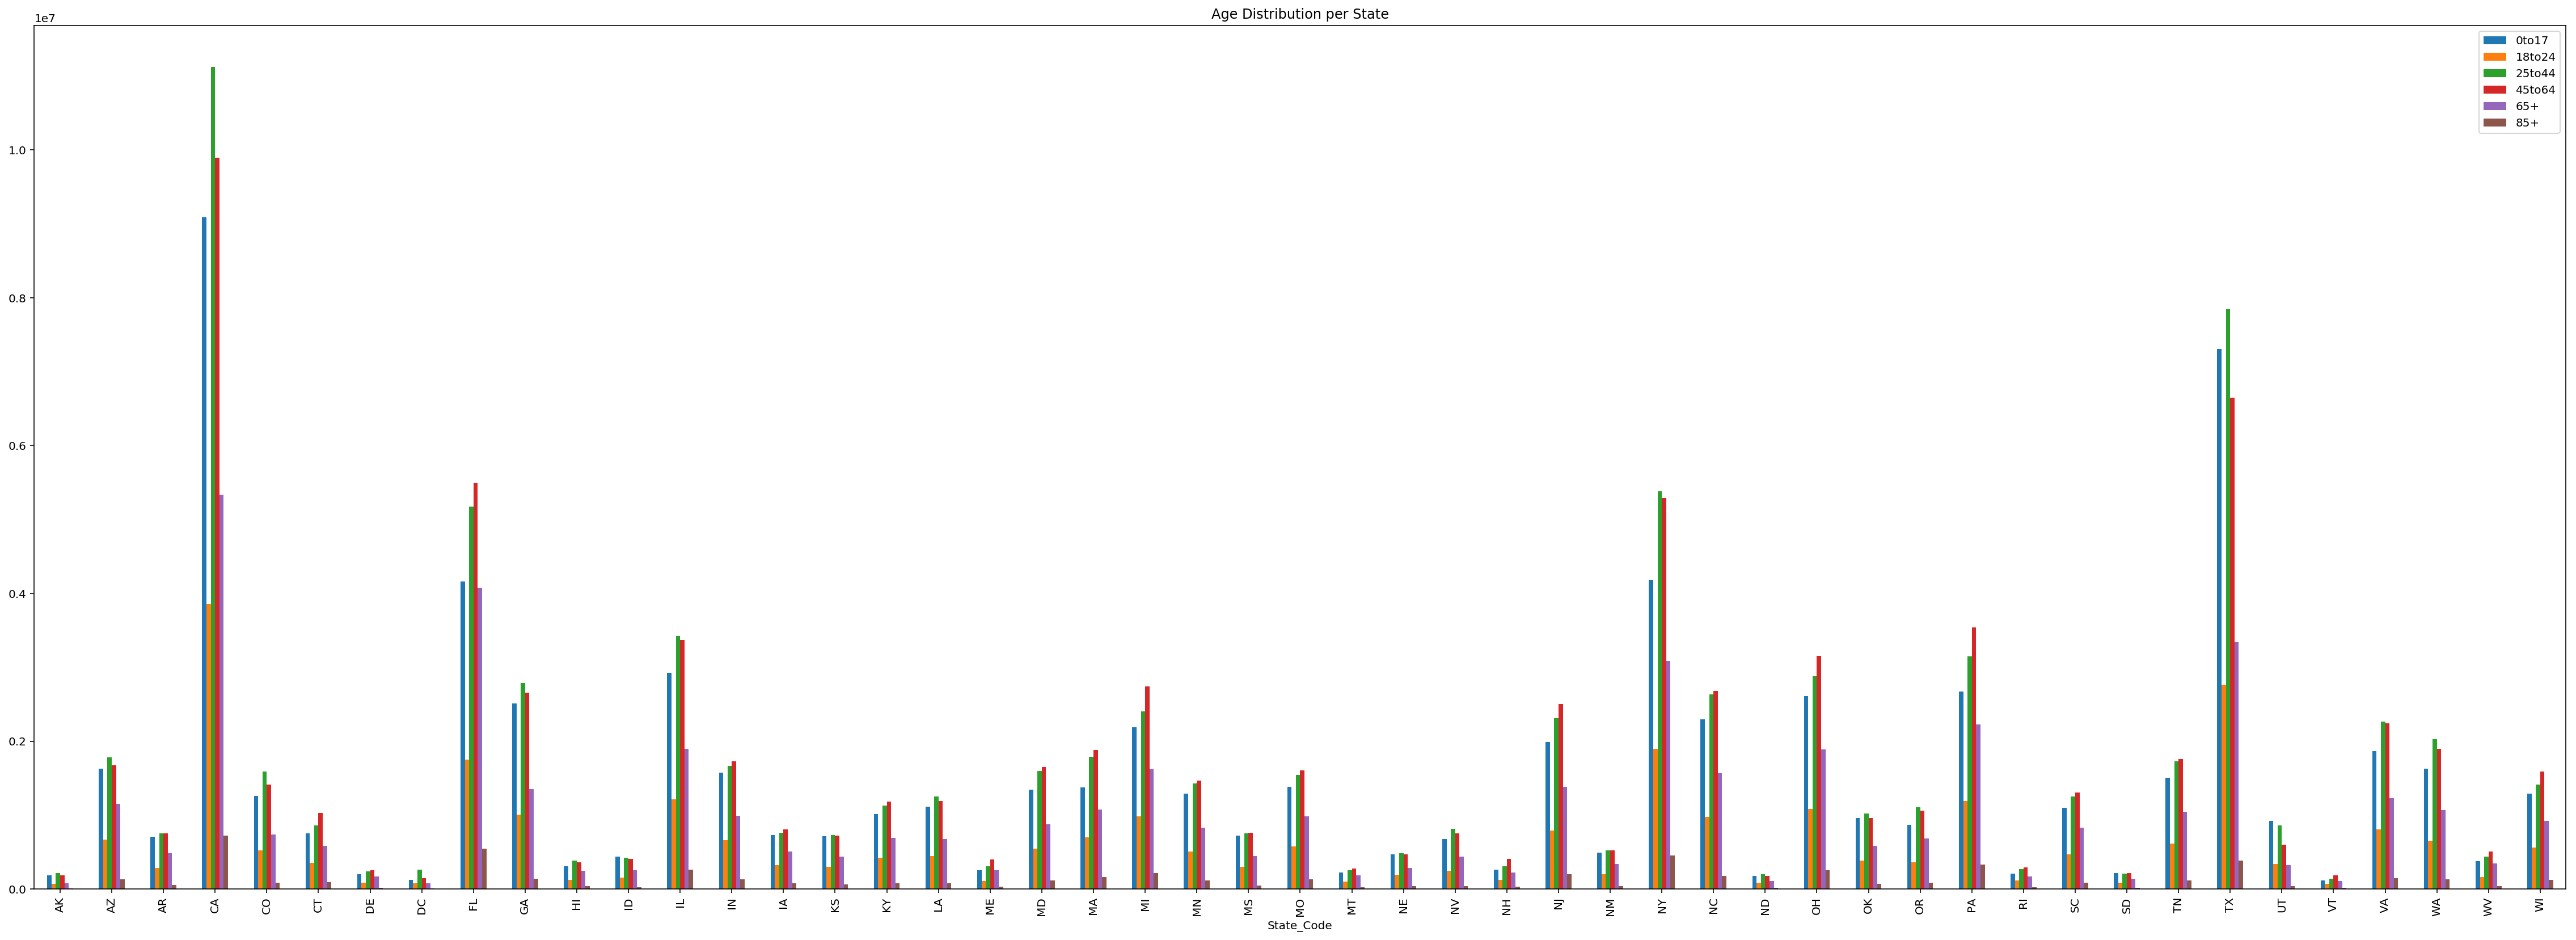

In [24]:
age_people[['0to17','18to24','25to44','45to64','65+','85+']].iloc[1:-1].plot(kind='bar', legend=True, figsize=(40,14), title = "Age Distribution per State")


In [15]:
percentage_people = age_people[['18to24','25to44','45to64','65+','85+']]
percentage_men = age_men[['18to24','25to44','45to64','65+','85+']]
percentage_women = age_women[['18to24','25to44','45to64','65+','85+']]

In [17]:
#percentage_people = age_people.div(age_people[['18+']], axis='index')
#percentage_people

In [18]:
#print((age_people.iloc[2]["25to44"]/age_people.iloc[2]["18+"]).round(2))
#percentage_people["25to44"].loc["AL"] = (age_people.loc["AL"]["25to44"]/age_people.loc["AL"]["18+"]).round(2)
#percentage_people

In [16]:
tmp = ['18to24','25to44','45to64','65+','85+']
PEOPLE = True
MEN = True
WOMEN = True
for i in age_people.index.values:
    for j in tmp:
        if PEOPLE:
            percentage_people[j].loc[i] = (age_people.loc[i][j]/age_people.loc[i]["18+"]).round(2)
        if MEN:
            percentage_men[j].loc[i] = (age_men.loc[i][j]/age_men.loc[i]["18+"]).round(2)
        if WOMEN:
            percentage_women[j].loc[i] = (age_women.loc[i][j]/age_women.loc[i]["18+"]).round(2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFram

In [17]:
percentage_people

,18to24,25to44,45to64,65+,85+
State_Code,,,,,
AL,0.12,0.33,0.34,0.21,0.02
AK,0.13,0.38,0.34,0.14,0.01
AZ,0.13,0.34,0.32,0.22,0.03
AR,0.12,0.33,0.33,0.21,0.03
CA,0.13,0.37,0.33,0.18,0.02
CO,0.12,0.37,0.33,0.17,0.02
CT,0.12,0.30,0.36,0.21,0.03
DE,0.11,0.32,0.34,0.22,0.03
DC,0.13,0.46,0.26,0.15,0.02


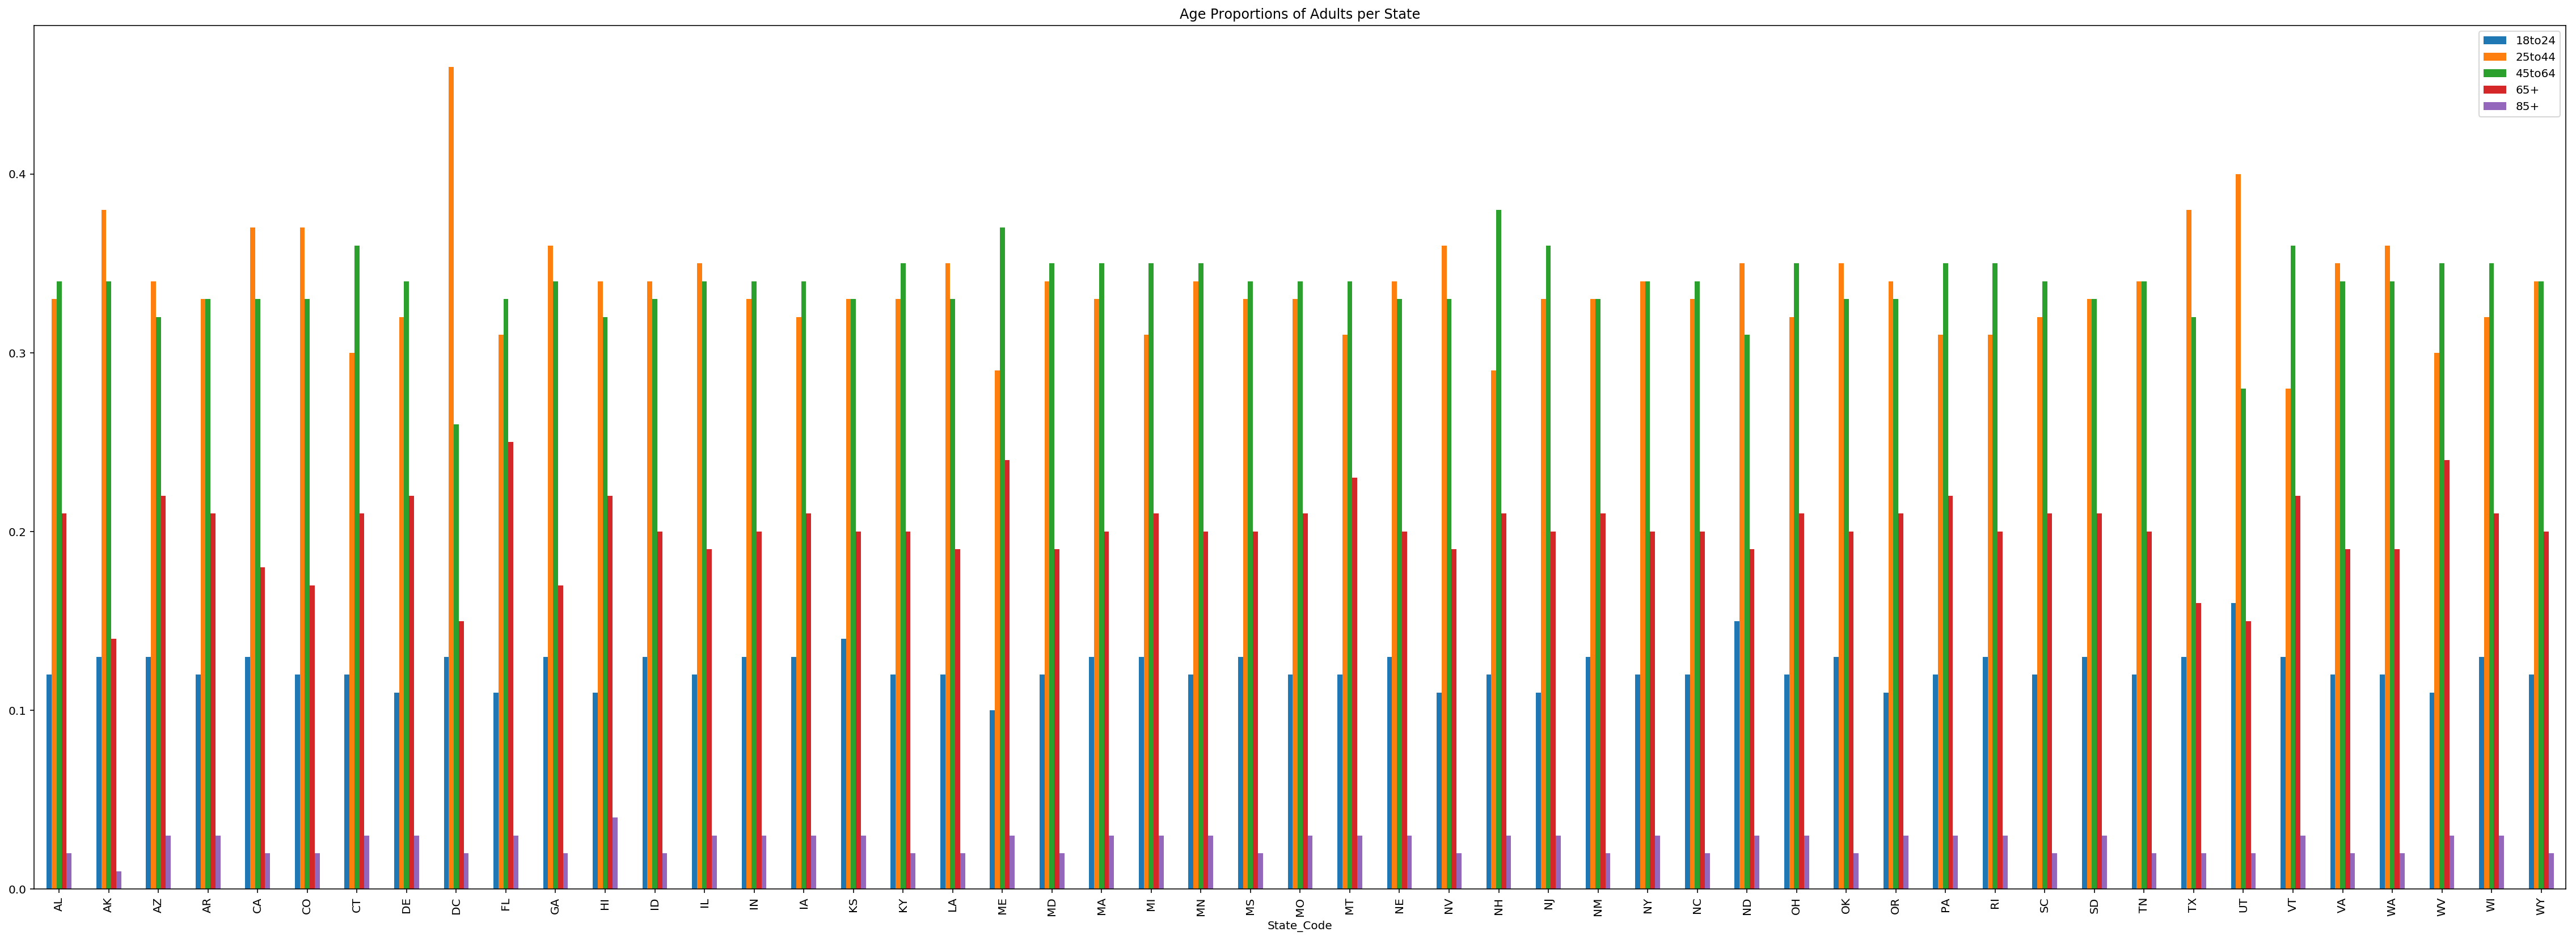

In [22]:
percentage_people[['18to24','25to44','45to64','65+','85+']].plot(kind='bar', legend=True, figsize=(40,14), title = "Age Proportions of Adults per State")

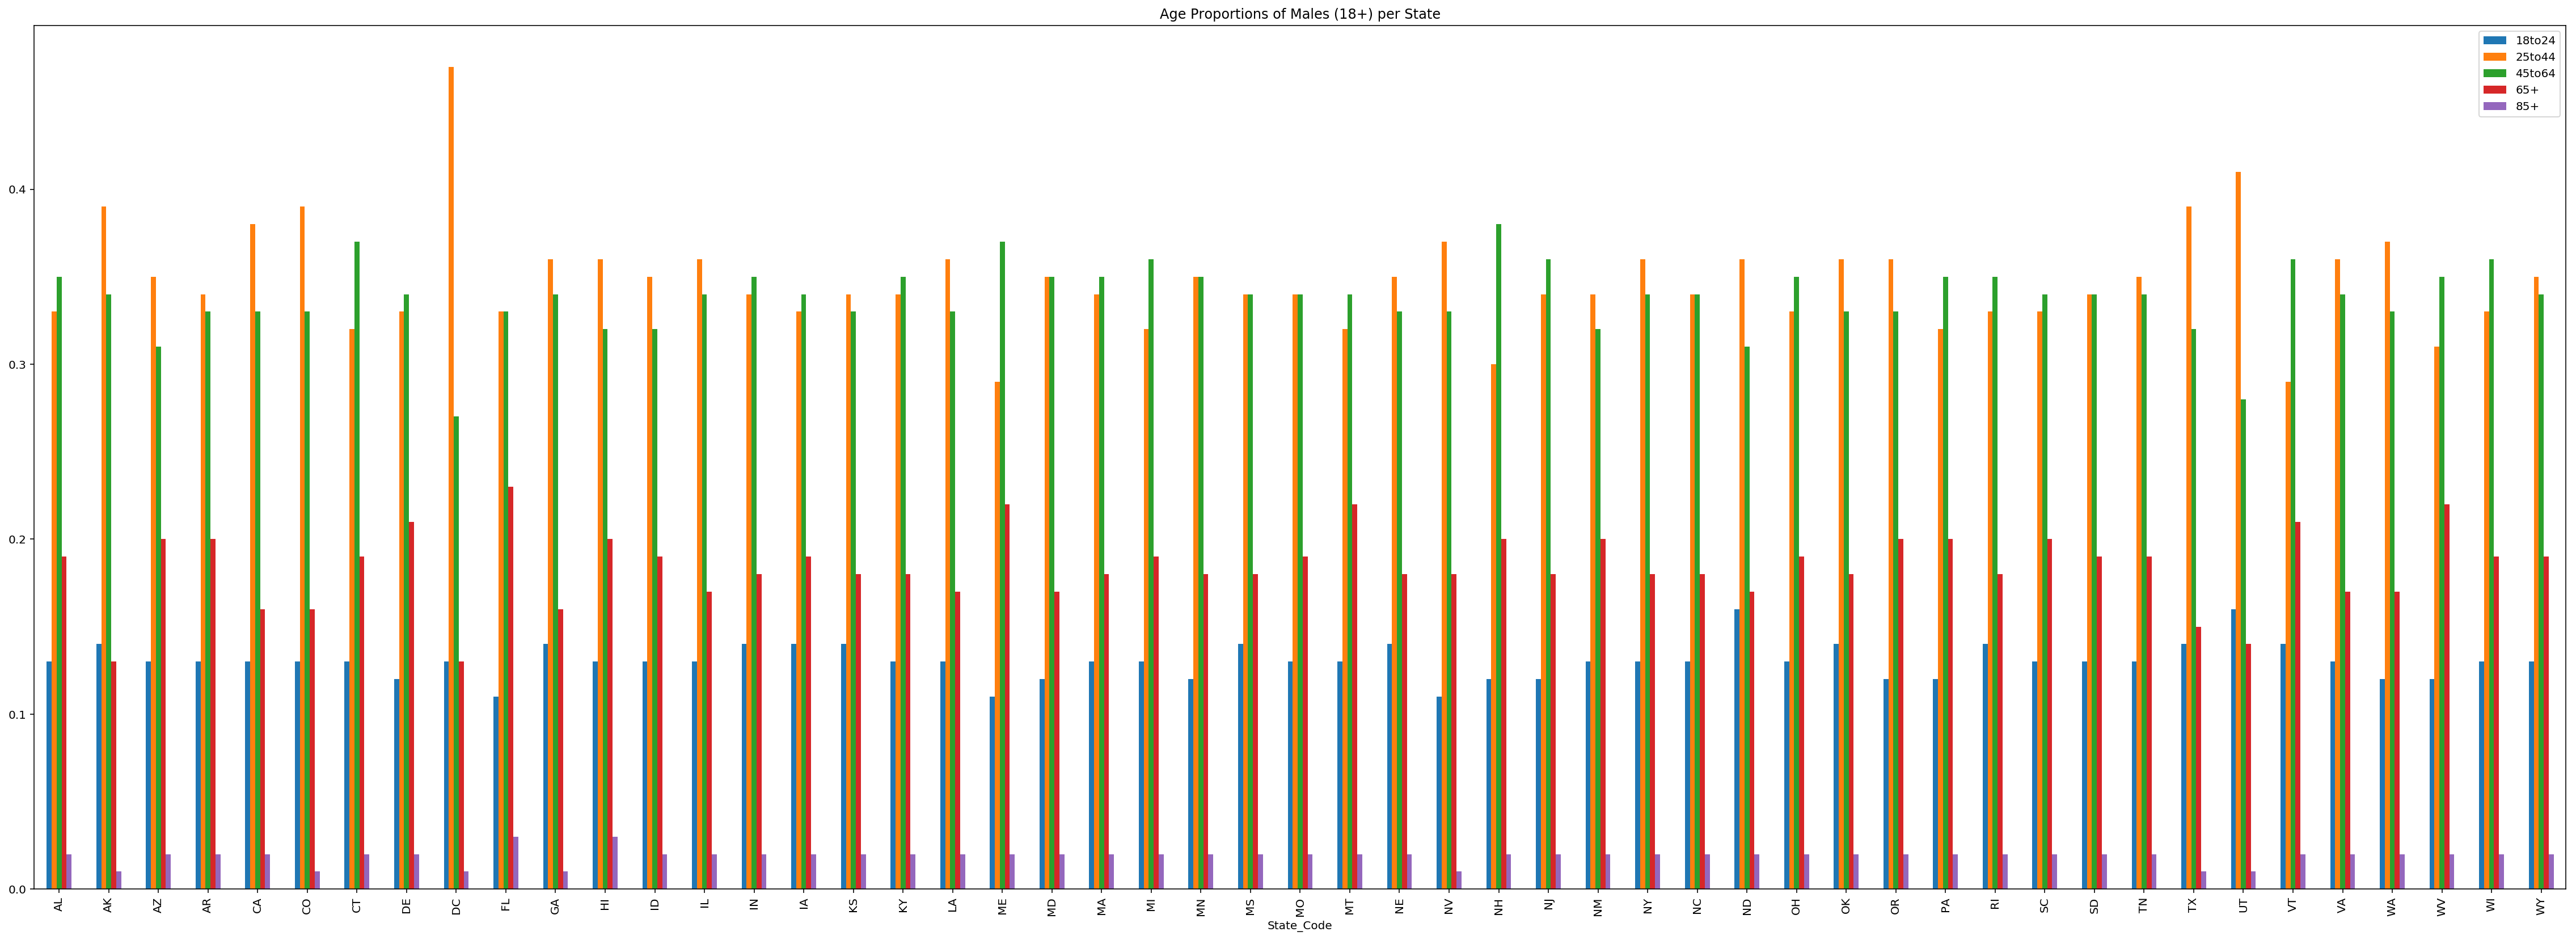

In [21]:
percentage_men[['18to24','25to44','45to64','65+','85+']].plot(kind='bar', legend=True, figsize=(40,14), title = "Age Proportions of Males (18+) per State")

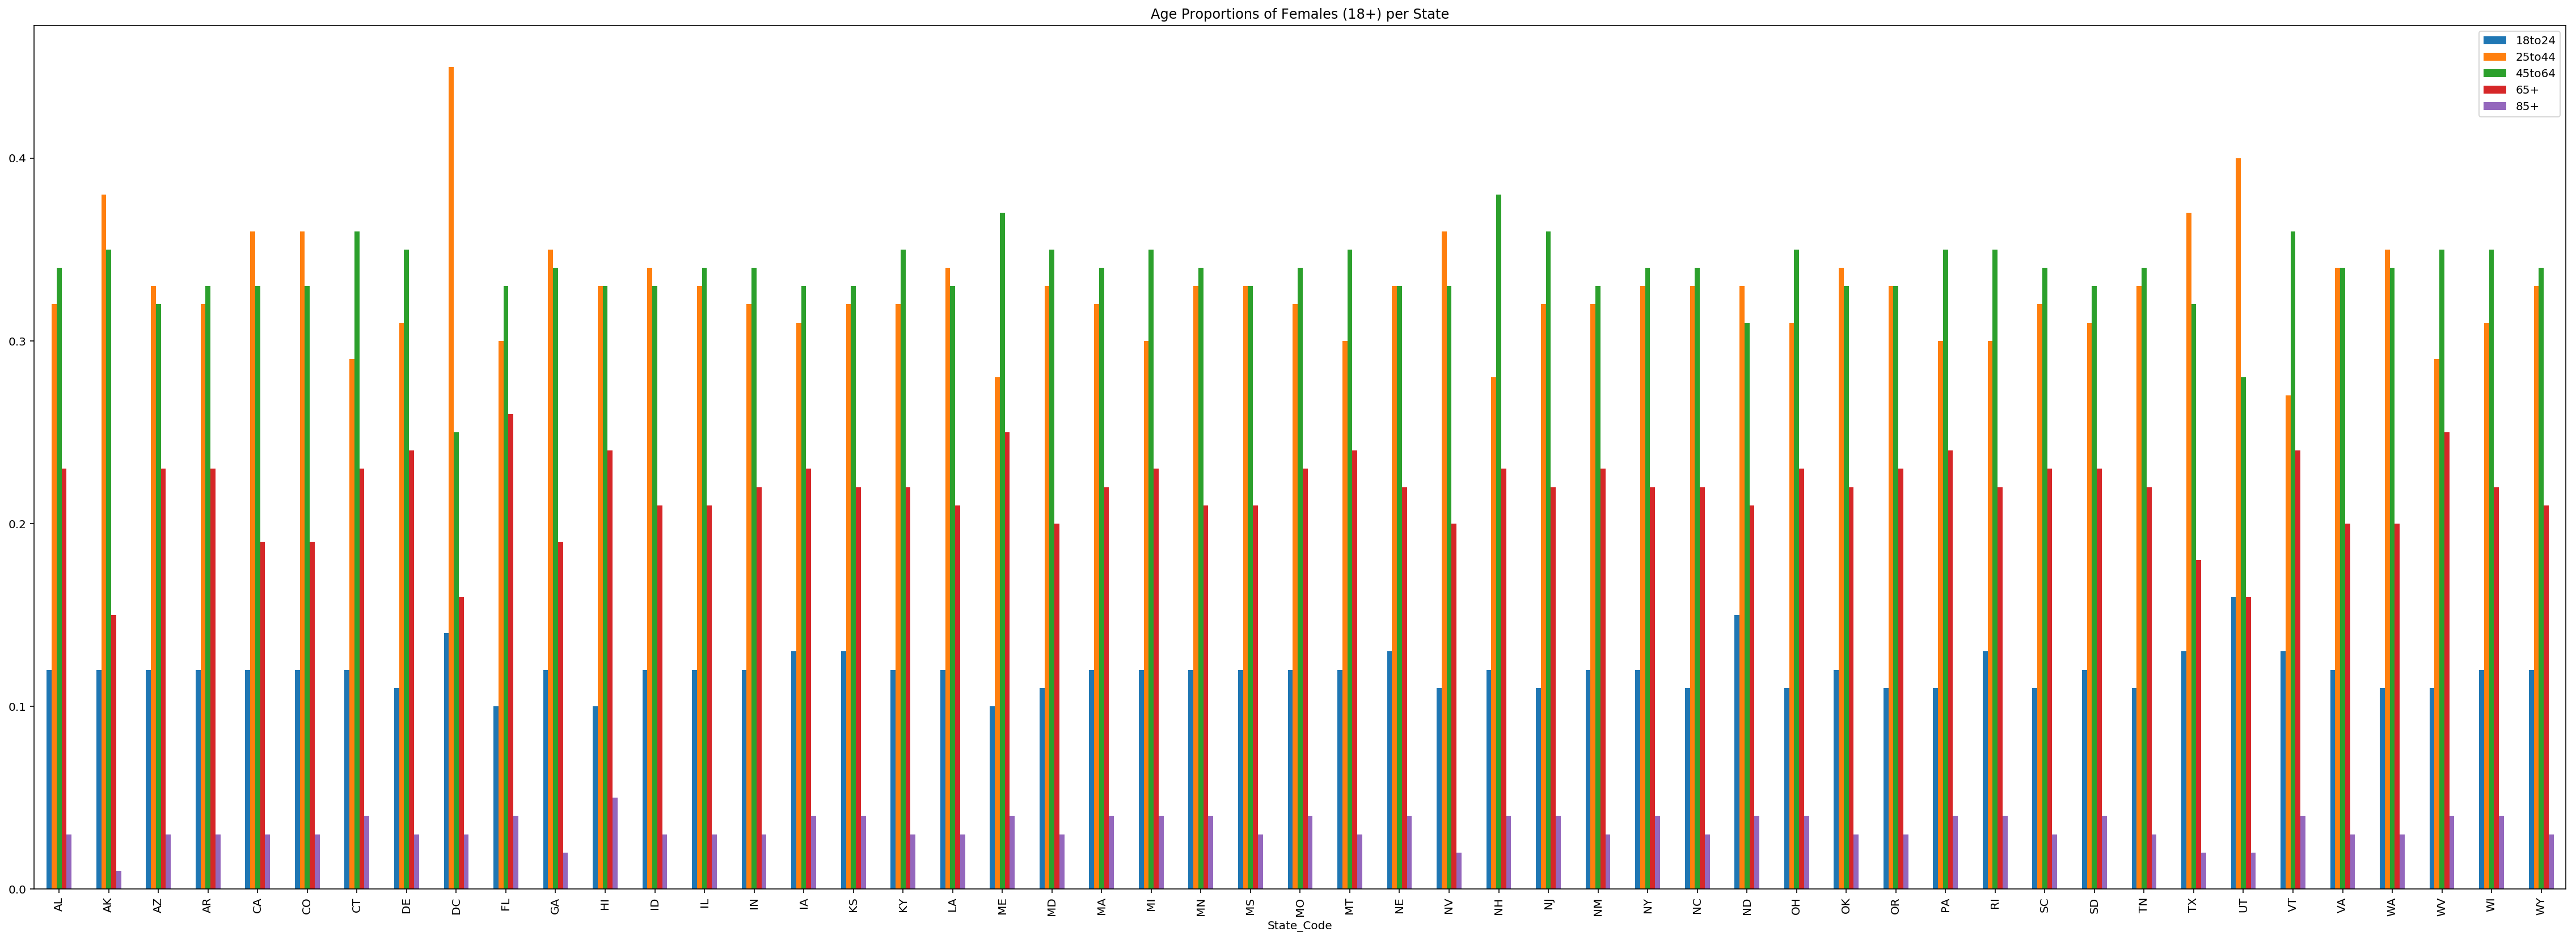

In [20]:
percentage_women[['18to24','25to44','45to64','65+','85+']].plot(kind='bar', legend=True, figsize=(40,14), title = "Age Proportions of Females (18+) per State")

In [102]:
data_income = pd.read_csv(dir+'Data/income.csv', sep=';')


In [103]:
data_income = data_income[["State", "Median\nincome"]]
data_income.columns = ["State", "Median Income"]
data_income['State_Code'] = data_income.State.str.strip().apply(lambda x: DSF_helpers.state_name_to_abrv(x))
#print(data_income["State_Code"].iloc[9])
data_income["State_Code"].iloc[9] = "DC"
data_income["State_Code"].iloc[0] = "USA"
data_income["Median Income"].astype(int)
data_income

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,State,Median Income,State_Code
0,United States,59.039,USA
1,Alabama,47.221,AL
2,Alaska,75.723,AK
3,Arizona,57.100,AZ
4,Arkansas,45.907,AR
5,California,66.637,CA
6,Colorado,70.566,CO
7,Connecticut,75.923,CT
8,Delaware,58.046,DE
9,D.C.,70.982,DC


In [100]:
data_income=data_income.set_index("State_Code")

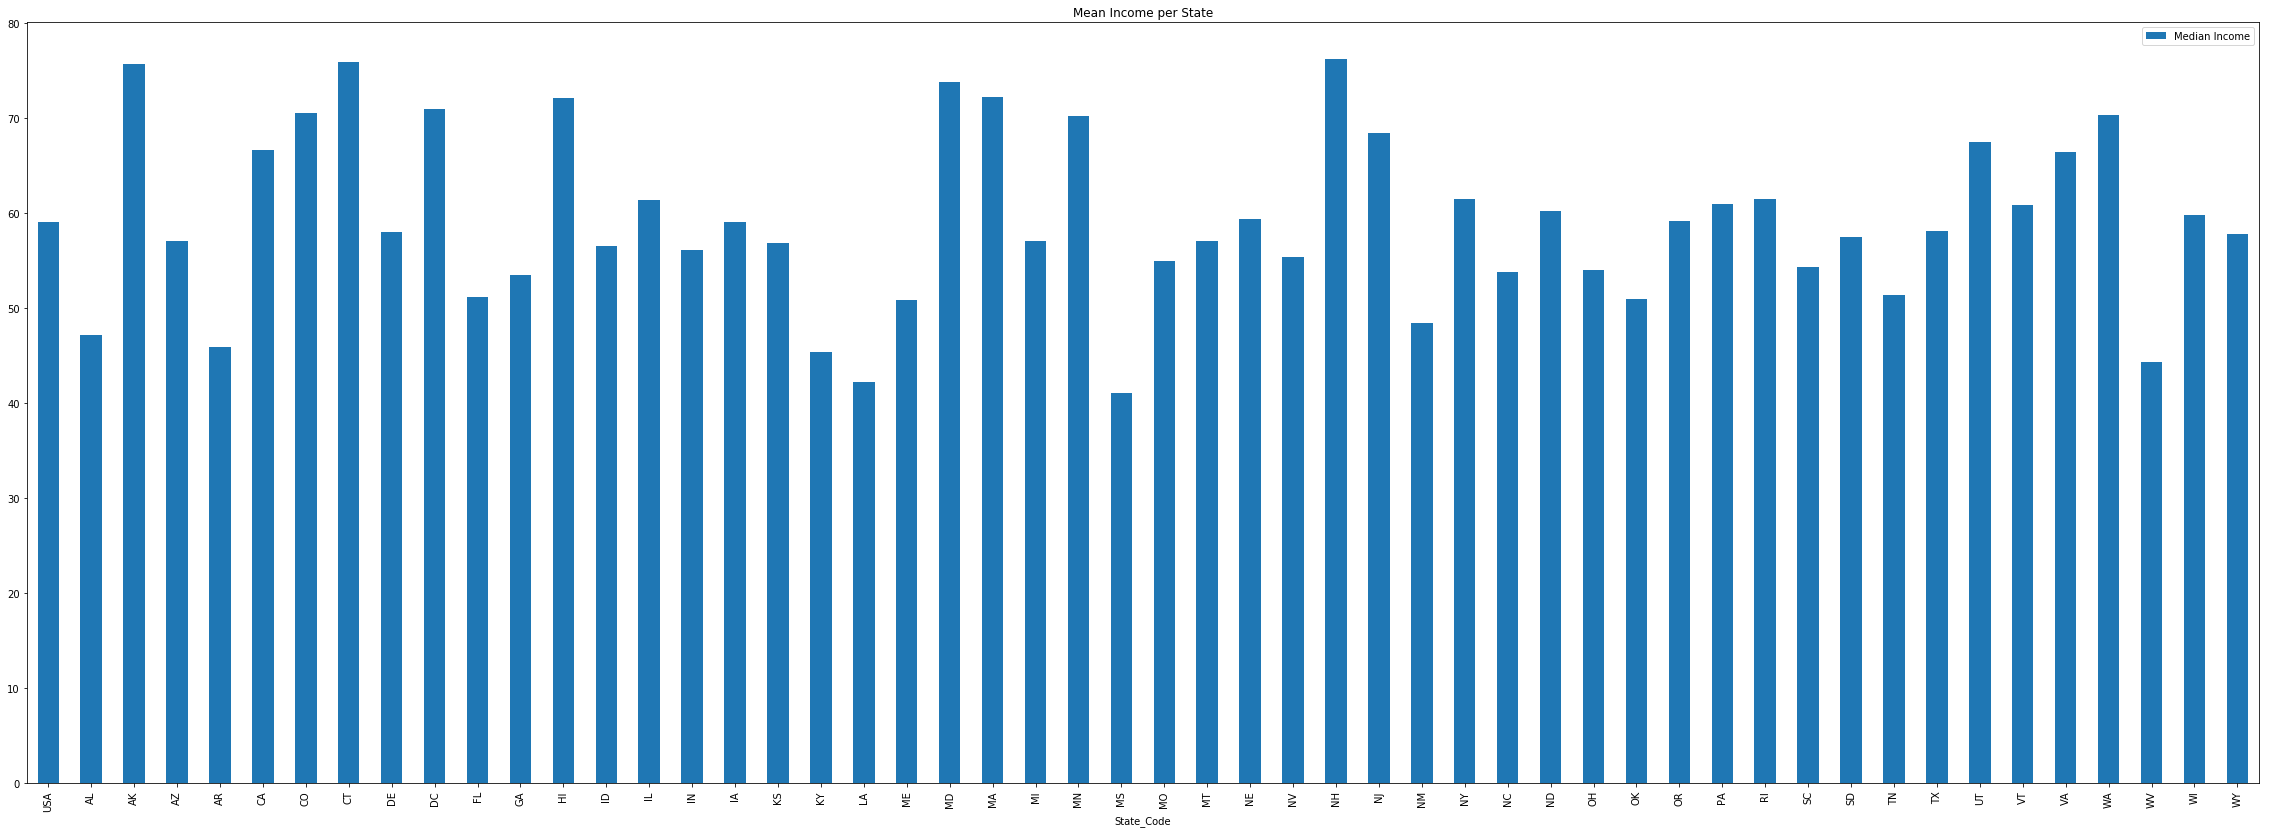

In [64]:
data_income[['Median Income',]].plot(kind='bar', legend=True, figsize=(40,14), title = "Mean Income per State")

In [97]:
#data_income = data_income.reset_index()
data_income2 = data_income
data_income2["Median Income"] = data_income2["Median Income"] * 1000

In [101]:
data_income

,level_0,index,State,Median Income
State_Code,,,,
USA,0,0,United States,59039.0
AL,1,1,Alabama,47221.0
AK,2,2,Alaska,75723.0
AZ,3,3,Arizona,57100.0
AR,4,4,Arkansas,45907.0
CA,5,5,California,66637.0
CO,6,6,Colorado,70566.0
CT,7,7,Connecticut,75923.0
DE,8,8,Delaware,58046.0


In [99]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale=scl,
        autocolorscale = True,
        locations = data_income2["State_Code"],
        z = data_income2["Median Income"].astype(float),
        locationmode = 'USA-states',
        text = data_income2["State_Code"],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Median Income")
        ) ]

layout = dict(
        title = 'Median Income per State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plot( fig, filename='d3-cloropleth-map' )

/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:466: UserWarning:

Your filename `d3-cloropleth-map` didn't end with .html. Adding .html to the end of your file.



'file:///Users/dpap/Documents/UvA/Fundamentals_Data_Science/Assignments/1/Notebook/d3-cloropleth-map.html'

TOP INDUSTRIES PER STATE

In [2]:
data_ind = pd.read_csv(dir+'Data/industries_state.csv', sep=';', dtype=object)

In [3]:
data_ind.head(15)

,STATE CODE,STATE DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,Alabama,--,Total,01: Total,73.409,98.540,1.634.391,NaN,G,67.370.353,G
3,01,Alabama,--,Total,02: 0-4,39.724,39.799,71.722,NaN,G,2.590.485,G
4,01,Alabama,--,Total,03: 5-9,13.646,13.804,89.771,NaN,G,2.941.589,G
5,01,Alabama,--,Total,04: 10-19,8.205,8.578,109.487,NaN,G,3.818.925,G
6,01,Alabama,--,Total,05: <20,61.575,62.181,270.980,NaN,G,9.350.999,G
7,01,Alabama,--,Total,06: 20-99,7.358,10.103,272.084,NaN,G,10.394.604,G
8,01,Alabama,--,Total,07: 100-499,1.981,5.266,232.765,NaN,G,9.405.233,G
9,01,Alabama,--,Total,08: <500,70.914,77.550,775.829,NaN,G,29.150.836,G


In [65]:
data_ind.columns.values

array(['STATE CODE', 'STATE DESCRIPTION', 'NAICS   CODE ',
       'NAICS DESCRIPTION', 'ENTERPRISE EMPLOYMENT SIZE',
       'NUMBER OF FIRMS', 'NUMBER OF ESTABLISHMENTS', 'EMPLOYMENT',
       'EMPLOYMENT RANGE FLAG', 'EMPLOYMENT NOISE FLAG',
       'ANNUAL PAYROLL ($1,000)', 'ANNUAL PAYROLL NOISE FLAG'],
      dtype=object)

In [4]:
data_ind=data_ind.dropna(how='all')
#data_ind = data_ind.drop(index=[0,1])
data_ind=data_ind[data_ind['ENTERPRISE EMPLOYMENT SIZE'] == '01:  Total']
data_ind=data_ind.drop(['ENTERPRISE EMPLOYMENT SIZE','NAICS   CODE ', 'EMPLOYMENT RANGE FLAG', 'STATE CODE', 'EMPLOYMENT NOISE FLAG', 'ANNUAL PAYROLL NOISE FLAG' ], axis=1)

In [5]:
tmp=['NUMBER OF FIRMS','NUMBER OF ESTABLISHMENTS', 'EMPLOYMENT','ANNUAL PAYROLL ($1,000)']
for i in tmp:
    data_ind[i]=data_ind[i].str.replace('.','').astype(int)

In [6]:
data_ind.head()

,STATE DESCRIPTION,NAICS DESCRIPTION,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,"ANNUAL PAYROLL ($1,000)"
2,Alabama,Total,73409,98540,1634391,67370353
11,Alabama,"Agriculture, Forestry, Fishing and Hunting",775,793,6597,260640
20,Alabama,"Mining, Quarrying, and Oil and Gas Extraction",171,228,7442,522426
29,Alabama,Utilities,110,426,17415,1590158
38,Alabama,Construction,7184,7317,79220,3860190


In [7]:
data_ind['State_Code'] = data_ind['STATE DESCRIPTION'].str.strip().apply(lambda x: DSF_helpers.state_name_to_abrv(x))

In [81]:
#data_ind=data_ind.set_index('State_Code')
data_ind=data_ind.reset_index()

AttributeError: 'function' object has no attribute 'reset_index'

In [8]:
data_ind.head()

,STATE DESCRIPTION,NAICS DESCRIPTION,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,"ANNUAL PAYROLL ($1,000)",State_Code
2,Alabama,Total,73409,98540,1634391,67370353,AL
11,Alabama,"Agriculture, Forestry, Fishing and Hunting",775,793,6597,260640,AL
20,Alabama,"Mining, Quarrying, and Oil and Gas Extraction",171,228,7442,522426,AL
29,Alabama,Utilities,110,426,17415,1590158,AL
38,Alabama,Construction,7184,7317,79220,3860190,AL


In [27]:


data_ind_2=data_ind.sort_values('ANNUAL PAYROLL ($1,000)', ascending=False).groupby("State_Code").head(6)#[data_ind["State_Code"]=="CA"]



In [28]:
data_ind_2.reset_index()
data_ind_2=data_ind_2.sort_values(["State_Code",'ANNUAL PAYROLL ($1,000)'],ascending=[True, False]).set_index('State_Code')

In [29]:
data_ind_2

,STATE DESCRIPTION,NAICS DESCRIPTION,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,"ANNUAL PAYROLL ($1,000)"
State_Code,,,,,,
AK,Alaska,Total,16952,20907,267999,15643303
AK,Alaska,Health Care and Social Assistance,2045,2578,49240,2880597
AK,Alaska,"Mining, Quarrying, and Oil and Gas Extraction",146,180,13566,1718501
AK,Alaska,Construction,2449,2537,18581,1637062
AK,Alaska,"Professional, Scientific, and Technical Services",1698,1920,18662,1427159
AK,Alaska,Transportation and Warehousing,870,1144,18736,1356522
AL,Alabama,Total,73409,98540,1634391,67370353
AL,Alabama,Manufacturing,3749,4158,248033,12530042
AL,Alabama,Health Care and Social Assistance,7957,10594,241618,11035006


In [32]:
ind_dict = {}
for i in data_ind_2.index.values:
    tmp=[]
    for ind in data_ind_2.loc[i]['NAICS DESCRIPTION']:
        if ind == 'Total':
            continue
        tmp.append(ind)
    ind_dict[i]=tmp
print (ind_dict)

{'AK': ['Health Care and Social Assistance', 'Mining, Quarrying, and Oil and Gas Extraction', 'Construction', 'Professional, Scientific, and Technical Services', 'Transportation and Warehousing'], 'AL': ['Manufacturing', 'Health Care and Social Assistance', 'Professional, Scientific, and Technical Services', 'Retail Trade', 'Finance and Insurance'], 'AR': ['Health Care and Social Assistance', 'Manufacturing', 'Management of Companies and Enterprises', 'Retail Trade', 'Wholesale Trade'], 'AZ': ['Health Care and Social Assistance', 'Professional, Scientific, and Technical Services', 'Finance and Insurance', 'Retail Trade', 'Administrative and Support and Waste Management and Remediation Services'], 'CA': ['Professional, Scientific, and Technical Services', 'Health Care and Social Assistance', 'Information', 'Manufacturing', 'Wholesale Trade'], 'CO': ['Professional, Scientific, and Technical Services', 'Health Care and Social Assistance', 'Administrative and Support and Waste Management a

In [33]:
myind  = pd.DataFrame.from_dict(ind_dict)

In [34]:
myind = myind.T
myind.columns=[["1","2","3","4","5"]]

In [37]:
myind["State"] = ""
for i in myind.index.values:
    myind["State"].loc[i] = state_dict[i]
#top_industries
myind=myind[['State', '1','2','3','4','5']]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [39]:
myind
myind.to_csv(dir+'myindustries_payroll.csv')


DEMOGRAPHICS DATASET FOR INDUSTRIES

In [2]:
demographics = pd.read_pickle("/Users/dpap/Downloads/demographics_dataset_v2.0 (1).pkl")

In [29]:
demographics.head()

,State,Region,Total.Population,electoralvotes,rep16_frac,dem16_frac,votes,votes16_trumpd,votes16_clintonh,votes16_johnsong,...,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Adult.obesity,Diabetes,Uninsured,Unemployment,percentage_religious,rallies_clinton,rallies_trump
code,,,,,,,,,,,,,,,,,,,,,
AL,Alabama,South,4706548.0,9,0.629000,0.346000,2078165,1306925,718084,43869,...,1.416418,12.050746,21.281343,0.350821,0.140821,0.174149,0.085701,0.77,0.0,0.0
AK,Alaska,West,696686.5,3,0.529000,0.377000,249484,130656,95511,14697,...,2.839655,11.675862,14.631034,0.298833,0.072625,0.276000,0.094083,0.45,0.0,0.0
AZ,Arizona,West,6358441.0,11,0.495000,0.454000,2062810,1021154,936250,80151,...,1.566667,13.316667,10.410000,0.278067,0.100800,0.205333,0.114067,0.53,0.0,0.0
AR,Arkansas,South,2877030.5,6,0.681466,0.318534,1121684,677904,378729,29518,...,2.529333,11.146000,21.049333,0.336160,0.124547,0.209827,0.082240,0.70,0.0,0.0
CA,California,West,36781241.5,55,0.328000,0.616000,11954317,3916209,7362490,402406,...,3.515517,9.853448,10.617241,0.242190,0.080776,0.189552,0.122517,0.49,0.0,0.0


In [3]:
dem_col = demographics.columns.values
print (dem_col)
occ_col = []
for i in dem_col:
    if 'occupations' in i:
        print("here")
        occ_col.append(i)

['State' 'Region' 'Total.Population' 'electoralvotes' 'rep16_frac'
 'dem16_frac' 'votes' 'votes16_trumpd' 'votes16_clintonh'
 'votes16_johnsong' 'votes16_steinj' 'At.Least.Bachelor.s.Degree'
 'At.Least.High.School.Diploma' 'Less.Than.High.School' 'Graduate.Degree'
 'White.not.Latino.Population' 'African.American.Population'
 'Native.American.Population' 'Asian.American.Population'
 'Population.some.other.race.or.races' 'Latino.Population'
 'Management.professional.and.related.occupations' 'Service.occupations'
 'Sales.and.office.occupations' 'Farming.fishing.and.forestry.occupations'
 'Construction.extraction.maintenance.and.repair.occupations'
 'Production.transportation.and.material.moving.occupations'
 'Adult.obesity' 'Diabetes' 'Uninsured' 'Unemployment'
 'percentage_religious' 'rallies_clinton' 'rallies_trump']
here
here
here
here
here
here


In [4]:
occ_col

['Management.professional.and.related.occupations',
 'Service.occupations',
 'Sales.and.office.occupations',
 'Farming.fishing.and.forestry.occupations',
 'Construction.extraction.maintenance.and.repair.occupations',
 'Production.transportation.and.material.moving.occupations']

In [5]:
demographics[occ_col]

,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations
code,,,,,,
AL,25.989552,15.726119,23.541045,1.416418,12.050746,21.281343
AK,32.703448,16.708621,21.448276,2.839655,11.675862,14.631034
AZ,29.160000,20.876667,24.660000,1.566667,13.316667,10.410000
AR,26.056000,16.844000,22.377333,2.529333,11.146000,21.049333
CA,32.975862,19.116379,23.932759,3.515517,9.853448,10.617241
CO,33.695312,18.175781,22.401563,2.464062,13.665625,9.597656
CT,38.862500,16.900000,24.831250,0.218750,8.462500,10.712500
DE,33.750000,17.616667,25.983333,0.633333,10.483333,11.483333
DC,56.750000,16.050000,19.200000,0.100000,3.300000,4.650000


In [6]:
demographics[occ_col].loc['AL']

Management.professional.and.related.occupations               25.989552
Service.occupations                                           15.726119
Sales.and.office.occupations                                  23.541045
Farming.fishing.and.forestry.occupations                       1.416418
Construction.extraction.maintenance.and.repair.occupations    12.050746
Production.transportation.and.material.moving.occupations     21.281343
Name: AL, dtype: float64

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [19]:
demographics[occ_col].T

code,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Management.professional.and.related.occupations,25.989552,32.703448,29.160000,26.056000,32.975862,33.695312,38.86250,33.750000,56.75,28.643284,...,36.607576,26.238421,29.116142,31.241379,36.325000,31.901866,32.171795,26.233636,28.690278,30.984783
Service.occupations,15.726119,16.708621,20.876667,16.844000,19.116379,18.175781,16.90000,17.616667,16.05,20.441045,...,17.066667,16.297368,18.414764,17.343103,17.096429,17.190299,18.029487,18.610000,16.836806,17.143478
Sales.and.office.occupations,23.541045,21.448276,24.660000,22.377333,23.932759,22.401563,24.83125,25.983333,19.20,25.694776,...,20.663636,23.100526,22.021654,23.720690,22.560714,24.007090,22.930769,22.875455,22.935417,20.504348
Farming.fishing.and.forestry.occupations,1.416418,2.839655,1.566667,2.529333,3.515517,2.464062,0.21875,0.633333,0.10,2.445522,...,4.065152,1.122632,3.090157,2.006897,1.553571,1.082836,3.870513,0.975455,1.854167,2.228261
Construction.extraction.maintenance.and.repair.occupations,12.050746,11.675862,13.316667,11.146000,9.853448,13.665625,8.46250,10.483333,3.30,12.244776,...,9.623485,12.049474,13.285039,12.993103,10.721429,11.542537,10.453846,14.944545,9.961806,16.110870
Production.transportation.and.material.moving.occupations,21.281343,14.631034,10.410000,21.049333,10.617241,9.597656,10.71250,11.483333,4.65,10.532090,...,11.968939,21.193684,14.071260,12.684483,11.753571,14.274627,12.557692,16.369091,19.727778,13.006522


In [17]:
demographics[occ_col].T.sort_values('AR', ascending=False)#.head(3).T.columns.values

code,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Management.professional.and.related.occupations,25.989552,32.703448,29.160000,26.056000,32.975862,33.695312,38.86250,33.750000,56.75,28.643284,...,36.607576,26.238421,29.116142,31.241379,36.325000,31.901866,32.171795,26.233636,28.690278,30.984783
Sales.and.office.occupations,23.541045,21.448276,24.660000,22.377333,23.932759,22.401563,24.83125,25.983333,19.20,25.694776,...,20.663636,23.100526,22.021654,23.720690,22.560714,24.007090,22.930769,22.875455,22.935417,20.504348
Production.transportation.and.material.moving.occupations,21.281343,14.631034,10.410000,21.049333,10.617241,9.597656,10.71250,11.483333,4.65,10.532090,...,11.968939,21.193684,14.071260,12.684483,11.753571,14.274627,12.557692,16.369091,19.727778,13.006522
Service.occupations,15.726119,16.708621,20.876667,16.844000,19.116379,18.175781,16.90000,17.616667,16.05,20.441045,...,17.066667,16.297368,18.414764,17.343103,17.096429,17.190299,18.029487,18.610000,16.836806,17.143478
Construction.extraction.maintenance.and.repair.occupations,12.050746,11.675862,13.316667,11.146000,9.853448,13.665625,8.46250,10.483333,3.30,12.244776,...,9.623485,12.049474,13.285039,12.993103,10.721429,11.542537,10.453846,14.944545,9.961806,16.110870
Farming.fishing.and.forestry.occupations,1.416418,2.839655,1.566667,2.529333,3.515517,2.464062,0.21875,0.633333,0.10,2.445522,...,4.065152,1.122632,3.090157,2.006897,1.553571,1.082836,3.870513,0.975455,1.854167,2.228261


In [18]:
demographics[occ_col].T.sort_values('CT', ascending=False)#.head(3).T.columns.values

code,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Management.professional.and.related.occupations,25.989552,32.703448,29.160000,26.056000,32.975862,33.695312,38.86250,33.750000,56.75,28.643284,...,36.607576,26.238421,29.116142,31.241379,36.325000,31.901866,32.171795,26.233636,28.690278,30.984783
Sales.and.office.occupations,23.541045,21.448276,24.660000,22.377333,23.932759,22.401563,24.83125,25.983333,19.20,25.694776,...,20.663636,23.100526,22.021654,23.720690,22.560714,24.007090,22.930769,22.875455,22.935417,20.504348
Service.occupations,15.726119,16.708621,20.876667,16.844000,19.116379,18.175781,16.90000,17.616667,16.05,20.441045,...,17.066667,16.297368,18.414764,17.343103,17.096429,17.190299,18.029487,18.610000,16.836806,17.143478
Production.transportation.and.material.moving.occupations,21.281343,14.631034,10.410000,21.049333,10.617241,9.597656,10.71250,11.483333,4.65,10.532090,...,11.968939,21.193684,14.071260,12.684483,11.753571,14.274627,12.557692,16.369091,19.727778,13.006522
Construction.extraction.maintenance.and.repair.occupations,12.050746,11.675862,13.316667,11.146000,9.853448,13.665625,8.46250,10.483333,3.30,12.244776,...,9.623485,12.049474,13.285039,12.993103,10.721429,11.542537,10.453846,14.944545,9.961806,16.110870
Farming.fishing.and.forestry.occupations,1.416418,2.839655,1.566667,2.529333,3.515517,2.464062,0.21875,0.633333,0.10,2.445522,...,4.065152,1.122632,3.090157,2.006897,1.553571,1.082836,3.870513,0.975455,1.854167,2.228261


In [41]:
demographics[occ_col].T.sort_values('CT', ascending=False).head(3).T.columns.values

array(['Management.professional.and.related.occupations',
       'Sales.and.office.occupations', 'Service.occupations'],
      dtype=object)

In [22]:
top_ind = {}
for i in demographics.index.values:
    top_ind[i]=list(demographics[occ_col].T.sort_values(i, ascending=False).head(5).T.columns.values)

In [23]:
top_ind

{'AL': ['Management.professional.and.related.occupations',
  'Sales.and.office.occupations',
  'Production.transportation.and.material.moving.occupations',
  'Service.occupations',
  'Construction.extraction.maintenance.and.repair.occupations'],
 'AK': ['Management.professional.and.related.occupations',
  'Sales.and.office.occupations',
  'Service.occupations',
  'Production.transportation.and.material.moving.occupations',
  'Construction.extraction.maintenance.and.repair.occupations'],
 'AZ': ['Management.professional.and.related.occupations',
  'Sales.and.office.occupations',
  'Service.occupations',
  'Construction.extraction.maintenance.and.repair.occupations',
  'Production.transportation.and.material.moving.occupations'],
 'AR': ['Management.professional.and.related.occupations',
  'Sales.and.office.occupations',
  'Production.transportation.and.material.moving.occupations',
  'Service.occupations',
  'Construction.extraction.maintenance.and.repair.occupations'],
 'CA': ['Managem

In [77]:
s  = pd.DataFrame.from_dict(top_ind)

In [29]:
s.columns = ['State Code', 'List of Top Industries']

In [78]:
top_industries = s.T
top_industries.columns=[["1","2","3","4","5"]]

In [79]:
top_industries

,1,2,3,4,5
AL,Management.professional.and.related.occupations,Sales.and.office.occupations,Production.transportation.and.material.moving....,Service.occupations,Construction.extraction.maintenance.and.repair...
AK,Management.professional.and.related.occupations,Sales.and.office.occupations,Service.occupations,Production.transportation.and.material.moving....,Construction.extraction.maintenance.and.repair...
AZ,Management.professional.and.related.occupations,Sales.and.office.occupations,Service.occupations,Construction.extraction.maintenance.and.repair...,Production.transportation.and.material.moving....
AR,Management.professional.and.related.occupations,Sales.and.office.occupations,Production.transportation.and.material.moving....,Service.occupations,Construction.extraction.maintenance.and.repair...
CA,Management.professional.and.related.occupations,Sales.and.office.occupations,Service.occupations,Production.transportation.and.material.moving....,Construction.extraction.maintenance.and.repair...
CO,Management.professional.and.related.occupations,Sales.and.office.occupations,Service.occupations,Construction.extraction.maintenance.and.repair...,Production.transportation.and.material.moving....
CT,Management.professional.and.related.occupations,Sales.and.office.occupations,Service.occupations,Production.transportation.and.material.moving....,Construction.extraction.maintenance.and.repair...
DE,Management.professional.and.related.occupations,Sales.and.office.occupations,Service.occupations,Production.transportation.and.material.moving....,Construction.extraction.maintenance.and.repair...
DC,Management.professional.and.related.occupations,Sales.and.office.occupations,Service.occupations,Production.transportation.and.material.moving....,Construction.extraction.maintenance.and.repair...
FL,Management.professional.and.related.occupations,Sales.and.office.occupations,Service.occupations,Construction.extraction.maintenance.and.repair...,Production.transportation.and.material.moving....


In [66]:
top_industries['index']=top_industries['index'].astype(str)
type(top_industries['index'].iloc[4])

pandas.core.series.Series

In [76]:
top_industries['index'].astype(str).iloc[4]['index']

index    CA
Name: 4, dtype: object

In [81]:
top_industries.index.values

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [87]:
top_industries["State"] = ""
for i in top_industries.index.values:
    top_industries["State"].loc[i] = state_dict[i]
#top_industries
top_industries=top_industries[['State', '1','2','3','4','5']]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [94]:
for i in top_industries.columns.values:
    top_industries[i]=top_industries[i].str.replace('.',' ')

In [95]:
top_industries.to_csv(dir+'industries.csv')